In [4]:
import pandas as pd
training_data = pd.read_excel('/content/drive/MyDrive/Training Data.xlsx')
training_data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Company Name,Exchange:Ticker,Company Type,Company Status,Geographic Locations,Business Description,Industry Classifications,Security Tickers
1,"024 Pharma, Inc. (OTCPK:EEIG)",OTCPK:EEIG,Public Company,Operating,United States of America (Primary),"024 Pharma, Inc. provides healthcare products ...",Beauty Care Products (Primary); Consumer Stapl...,OTCPK:EEIG
2,"1-800-FLOWERS.COM, Inc. (NasdaqGS:FLWS)",NasdaqGS:FLWS,Public Company,Operating,United States of America (Primary),"1-800-Flowers.com, Inc., together with its sub...","Catalog Flowers, Gifts and Novelties (Primary)...",NasdaqGS:FLWS; DB:FWC
3,12 Retech Corporation (OTCPK:RETC),OTCPK:RETC,Public Company,Operating,United States of America (Primary),"12 Retech Corporation, through its subsidiarie...",Information Technology (Primary); Internet Sof...,OTCPK:RETC
4,"1347 Property Insurance Holdings, Inc. (Nasdaq...",NasdaqGM:PIH,Public Company,Operating,United States of America (Primary),"1347 Property Insurance Holdings, Inc., throug...",Casualty (Primary); Financials (Primary); Fire...,NasdaqGM:PIH
...,...,...,...,...,...,...,...,...
1998,Delhi Bank Corp. (OTCPK:DWNX),OTCPK:DWNX,Public Company,Operating,United States of America (Primary),Delhi Bank Corp. operates as a bank holding co...,Banks (Primary); Banks (Primary); Financials (...,OTCPK:DWNX
1999,"dELiA*s, Inc. (OTCPK:DLIA.Q)",OTCPK:DLIA.Q,Public Company,Operating,United States of America (Primary),"dELiA*s, Inc. operates as a multi-channel reta...",Catalog Apparel and Accessory Retail (Primary)...,OTCPK:DLIA.Q
2000,"Delivery Technology Solutions, Inc. (OTCPK:DTSL)",OTCPK:DTSL,Public Company,Operating,United States of America (Primary),"Delivery Technology Solutions, Inc. offers res...",Commercial and Professional Services (Primary)...,OTCPK:DTSL
2001,Delmar Bancorp (OTCPK:DBCP),OTCPK:DBCP,Public Company,Operating,United States of America (Primary),Delmar Bancorp operates as the bank holding co...,Banks (Primary); Banks (Primary); Financials (...,OTCPK:DBCP


In [5]:
#As we can observe that the Columns names in the DataFrame is in 1st row so, we would shift that
#and drop that row from the dataset after setting it as Column names
training_data.columns = training_data.iloc[0]
training_data.drop(training_data.index[0] , inplace= True)
training_data

,Company Name,Exchange:Ticker,Company Type,Company Status,Geographic Locations,Business Description,Industry Classifications,Security Tickers
1,"024 Pharma, Inc. (OTCPK:EEIG)",OTCPK:EEIG,Public Company,Operating,United States of America (Primary),"024 Pharma, Inc. provides healthcare products ...",Beauty Care Products (Primary); Consumer Stapl...,OTCPK:EEIG
2,"1-800-FLOWERS.COM, Inc. (NasdaqGS:FLWS)",NasdaqGS:FLWS,Public Company,Operating,United States of America (Primary),"1-800-Flowers.com, Inc., together with its sub...","Catalog Flowers, Gifts and Novelties (Primary)...",NasdaqGS:FLWS; DB:FWC
3,12 Retech Corporation (OTCPK:RETC),OTCPK:RETC,Public Company,Operating,United States of America (Primary),"12 Retech Corporation, through its subsidiarie...",Information Technology (Primary); Internet Sof...,OTCPK:RETC
4,"1347 Property Insurance Holdings, Inc. (Nasdaq...",NasdaqGM:PIH,Public Company,Operating,United States of America (Primary),"1347 Property Insurance Holdings, Inc., throug...",Casualty (Primary); Financials (Primary); Fire...,NasdaqGM:PIH
5,1847 Holdings LLC (OTCPK:EFSH),OTCPK:EFSH,Public Company,Operating,United States of America (Primary),"1847 Holdings LLC, through its subsidiaries, p...",Commercial and Professional Services (Primary)...,OTCPK:EFSH
...,...,...,...,...,...,...,...,...
1998,Delhi Bank Corp. (OTCPK:DWNX),OTCPK:DWNX,Public Company,Operating,United States of America (Primary),Delhi Bank Corp. operates as a bank holding co...,Banks (Primary); Banks (Primary); Financials (...,OTCPK:DWNX
1999,"dELiA*s, Inc. (OTCPK:DLIA.Q)",OTCPK:DLIA.Q,Public Company,Operating,United States of America (Primary),"dELiA*s, Inc. operates as a multi-channel reta...",Catalog Apparel and Accessory Retail (Primary)...,OTCPK:DLIA.Q
2000,"Delivery Technology Solutions, Inc. (OTCPK:DTSL)",OTCPK:DTSL,Public Company,Operating,United States of America (Primary),"Delivery Technology Solutions, Inc. offers res...",Commercial and Professional Services (Primary)...,OTCPK:DTSL
2001,Delmar Bancorp (OTCPK:DBCP),OTCPK:DBCP,Public Company,Operating,United States of America (Primary),Delmar Bancorp operates as the bank holding co...,Banks (Primary); Banks (Primary); Financials (...,OTCPK:DBCP


In [6]:
#Let's have a look at all the features we have in the dataset in order to classify the campanies on the basis of tags
training_data.columns

Index(['Company Name', 'Exchange:Ticker', 'Company Type', 'Company Status',
       'Geographic Locations', 'Business Description',
       'Industry Classifications', 'Security Tickers'],
      dtype='object', name=0)

# Features:

In [7]:
# Company Type :
print('Unique Company_Type: ',training_data['Company Type'].unique())
# All the rows have just one type of Company which indicates to Public_Company so there is no need of using the feature in order
# to perform classification
# Company Status :
print('Unique Company_Status: ',training_data['Company Status'].unique())
# All the rows have just one status of Company which indicates to Operating so there is no need of using the feature in order
# to perform classification
# Geographic Locations :
print('Unique Geographic Locations: ',training_data['Geographic Locations'].unique())
# All the rows have just one Geographic location of Company which indicates to United States of America so there is no need of using the feature in order
# to perform classification

training_data.drop(columns= ['Company Type','Company Status', 'Geographic Locations' ], inplace= True)

Unique Company_Type:  ['Public Company']
Unique Company_Status:  ['Operating']
Unique Geographic Locations:  ['United States of America (Primary)']


In [8]:
print('Percentage of Datapoints having unique Exchange:Ticker Feature: ',len(training_data['Exchange:Ticker'].value_counts())/len(training_data)*100)
print('Percentage of Datapoints having unique Security Tickers Feature: ',len(training_data['Security Tickers'].value_counts())/len(training_data)*100)

Percentage of Datapoints having unique Exchange:Ticker Feature:  99.45054945054946
Percentage of Datapoints having unique Security Tickers Feature:  99.7002997002997


Since both the Features Exchange:Ticker and Security:Ticker have more than 99% of the values different for all the rows , it provide any significant insights in terms of Multi-class Classification and hence, we would drop these two Featrues as well

In [9]:
training_data.drop(columns= ['Exchange:Ticker', 'Security Tickers'], inplace= True)

In [10]:
# Checking for any null values
print('Number of Null values: ',training_data.isnull().sum().sum())

print('Shape of Dataframe after removing Features: ', training_data.shape)

Number of Null values:  0
Shape of Dataframe after removing Features:  (2002, 3)


**Company Name:** Each company will have different name so we can't use it as a Feature for our classificatiion . Even if we use it then since the Company data will have different Company names then the vectorized form will create a prblem for us, since it'll try to vectorize data through a vocabulary which won't consist those words

In [11]:
training_data.drop(columns= ['Company Name'], inplace= True)

# Class Label Column:

In [12]:
#If we observe the Column G which represents Industry Classification and which has all the Class labels for  a Multi-class Classification
#It was n number of tags in each row , but as per the document we would just need the 1st tag in order to put a label to that datapoint
training_data['Industry Classifications'][1]

'Beauty Care Products (Primary); Consumer Staples (Primary); Hair Care Products (Primary); Household and Personal Products (Primary); Personal Products (Primary); Personal Products (Primary); Skin Care Products (Primary); Vitamins and Nutritional Supplements (Primary); Healthcare; Pharmaceutical Products; Pharmaceuticals; Pharmaceuticals; Pharmaceuticals, Biotechnology and Life Sciences'

In [13]:
# Getting just the 1st Tag in Industry Classification column for each row
category_list = training_data['Industry Classifications'].values

for i in range(len(category_list)):
  category_list[i] = category_list[i].split(";")[0]
  category_list[i] = category_list[i].replace('(Primary)', '')

In [14]:
training_data['Industry Classifications'] = category_list
training_data

,Business Description,Industry Classifications
1,"024 Pharma, Inc. provides healthcare products ...",Beauty Care Products
2,"1-800-Flowers.com, Inc., together with its sub...","Catalog Flowers, Gifts and Novelties"
3,"12 Retech Corporation, through its subsidiarie...",Information Technology
4,"1347 Property Insurance Holdings, Inc., throug...",Casualty
5,"1847 Holdings LLC, through its subsidiaries, p...",Commercial and Professional Services
...,...,...
1998,Delhi Bank Corp. operates as a bank holding co...,Banks
1999,"dELiA*s, Inc. operates as a multi-channel reta...",Catalog Apparel and Accessory Retail
2000,"Delivery Technology Solutions, Inc. offers res...",Commercial and Professional Services
2001,Delmar Bancorp operates as the bank holding co...,Banks


In [15]:
# If we oberve here we have a lot of Class labels whose corresponding Dataponits are only 1.
# This brings us a case a Class-Imbalance and need to be fixed
training_data['Industry Classifications'].value_counts()

Banks                                                                 241
Healthcare                                                            153
Biotechnology                                                         145
Energy                                                                133
Consumer Discretionary                                                117
                                                                     ... 
Colleges, Universities, Professional Schools, and Junior Colleges       1
Alcohol and Narcotic Testing Devices                                    1
Athletic Footwear                                                       1
Beverage Distribution                                                   1
Materials                                                               1
Name: Industry Classifications, Length: 202, dtype: int64

In [16]:
#Filtering rows in dataset which doesn't have alphabets in Industry Classifictions tags
training_data = training_data[training_data['Industry Classifications'].str.contains('[A-Za-z]', na=False)] 

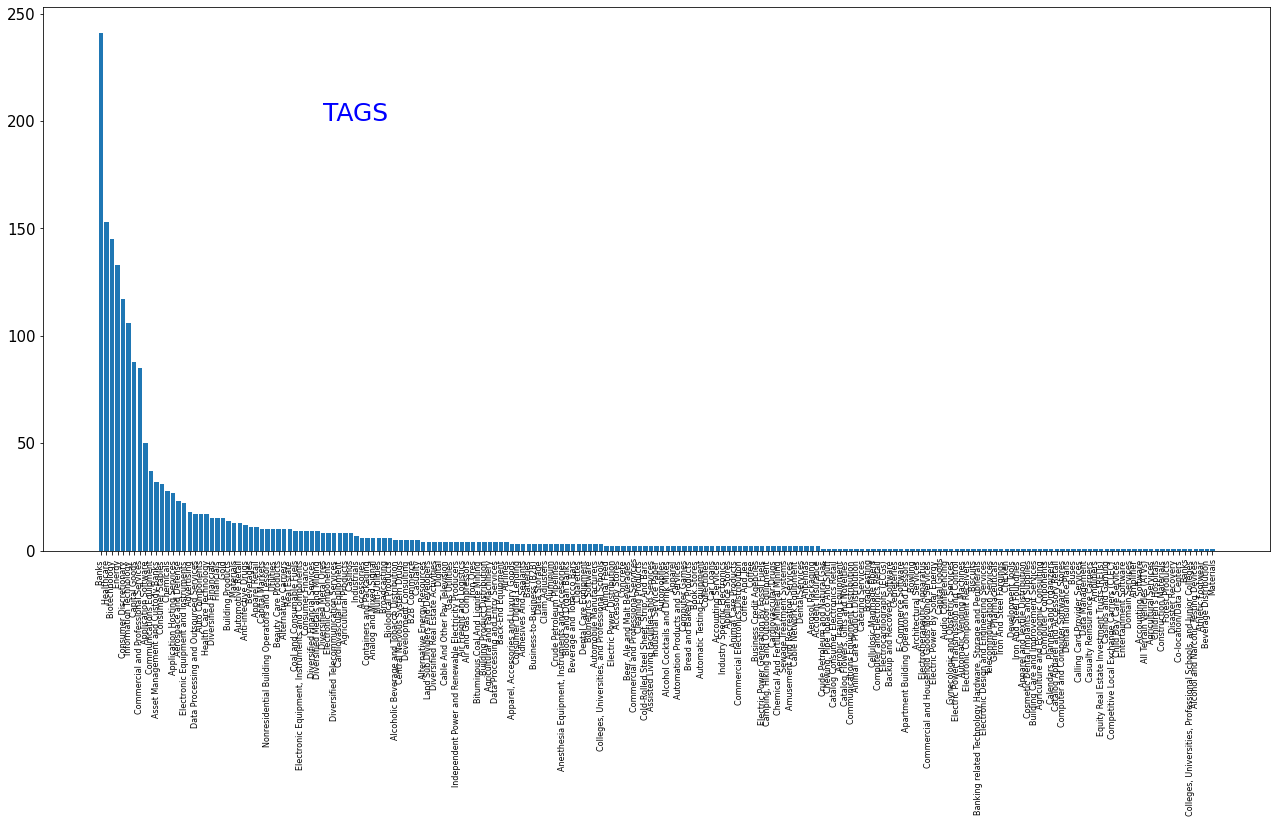

In [17]:
# Creating a Bar Graph in order to check Class Imbalance 
tags = dict(training_data['Industry Classifications'].value_counts())

import matplotlib.pyplot as plt
from matplotlib import text

category = list(tags.keys())
values = list(tags.values())

plt.figure(figsize= (22,10))
plt.bar(category , values)
plt.xticks(category, rotation='vertical', size = 8)
plt.text(40, 200, 'TAGS',size= 25 , color = 'blue')
plt.yticks(size = 15)
plt.show()

In [18]:
# In order to fix this class imbalance we need to Find a Elbow point , more like a threshold value so that we can upsample our data
# till that n number of points . Here we are using percentile values
import numpy as np
for i in range(0,101,10):
  print(str(i) +'th Percentile: ', np.percentile(values, i))

0th Percentile:  1.0
10th Percentile:  1.0
20th Percentile:  1.0
30th Percentile:  1.0
40th Percentile:  2.0
50th Percentile:  2.0
60th Percentile:  3.0
70th Percentile:  4.0
80th Percentile:  8.0
90th Percentile:  15.0
100th Percentile:  241.0


In [19]:
for i in range(90,101,1):
  print(str(i) +'th Percentile: ', np.percentile(values, i))

90th Percentile:  15.0
91th Percentile:  17.0
92th Percentile:  18.0
93th Percentile:  23.0
94th Percentile:  28.0
95th Percentile:  32.0
96th Percentile:  50.0
97th Percentile:  88.0
98th Percentile:  117.0
99th Percentile:  145.0
100th Percentile:  241.0


So we would consider the value at 96th percentile i.e, 50 in order to do the upsampling

In [20]:
threshold_value = 50
class_label = []
for key, value in tags.items():
  if value < threshold_value:
    class_label.append(key)

print('Number of Class label which has datapoints below Thrshold level: ', len(class_label))

Number of Class label which has datapoints below Thrshold level:  192


So we need to upsample a total of 193 class labels

In [21]:
from sklearn.utils import resample

for i in class_label:
  df_minority = training_data[training_data['Industry Classifications'] == i]
  df_minority_upsampled = resample(df_minority, replace=True, n_samples= 49 , random_state= 100)
  training_data = pd.concat([training_data, df_minority_upsampled], ignore_index= True)

training_data['Industry Classifications'].value_counts()

Banks                                    241
Healthcare                               153
Biotechnology                            145
Energy                                   133
Consumer Discretionary                   117
                                        ... 
Catalog Apparel and Accessory Retail      50
Calling Card Provider Services            50
Casualty Reinsurance Carriers             50
E-Commerce Software                       50
Catalog Flowers, Gifts and Novelties      50
Name: Industry Classifications, Length: 201, dtype: int64

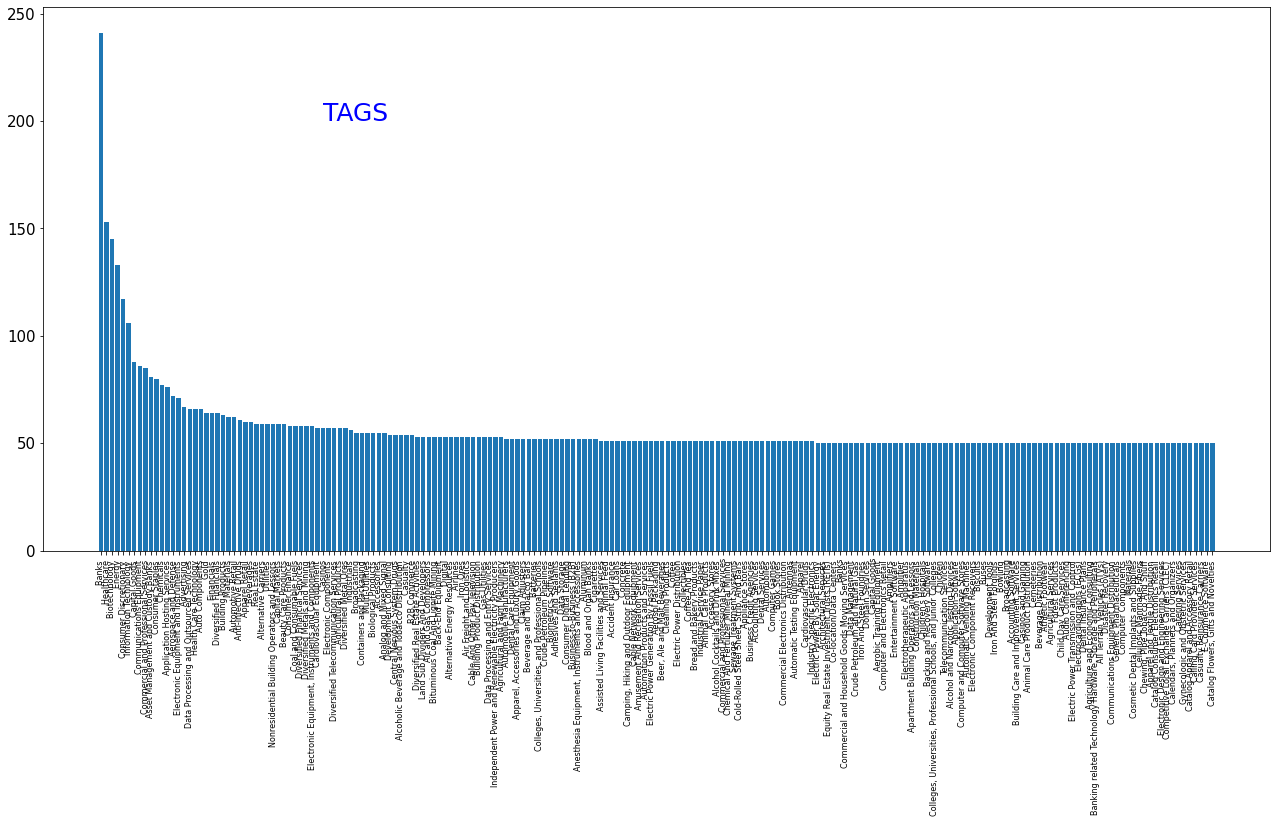

In [22]:
# Bar plot Visualization after upsampling
tags = dict(training_data['Industry Classifications'].value_counts())

import matplotlib.pyplot as plt
from matplotlib import text

category = list(tags.keys())
values = list(tags.values())

plt.figure(figsize= (22,10))
plt.bar(category , values)
plt.xticks(category, rotation='vertical', size = 8)
plt.text(40, 200, 'TAGS',size= 25 , color = 'blue')
plt.yticks(size = 15)
plt.show()

In [23]:
print('Number of Datapoints after Upsampling: ', len(training_data))

Number of Datapoints after Upsampling:  11399


# Text Featurization:

In [24]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english') #importing stopwords to remove them from text data

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words') # these dowmloads will help us to remove unecessary verbs from your Texts

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [25]:
#Here I have customly Designed a Fuction will take care of entire Text Preprocessing in one go :
def chunking(text):
  verb_list = []
  chunk = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(text)))
  if hasattr(chunk, 'label'):
    for i in chunk.leaves():
      #print(i)
      if i[1] == 'VBZ' or i[1] == 'VBN': # we are removing verbs which doesn't play a vital role for your classification purpose
        #print(i[0])
        verb_list.append(i[0])
  #print(verb_list)
  for word in verb_list:
    text = text.replace(word, '')
  return text

def text_preprocessing(dataframe, column_name):
  import re
  #Regex Preprocessing
  dataframe[column_name] = dataframe[column_name].apply(lambda x :  x.lower())
  dataframe[column_name] = dataframe[column_name].apply(lambda x : re.sub(r'\([^()]*\)', '', x))
  dataframe[column_name] = dataframe[column_name].apply(lambda x : re.sub(r'[\n]+' , '\n' , x))
  dataframe[column_name] = dataframe[column_name].apply(lambda x : x.replace('\'',' '))
  dataframe[column_name] = dataframe[column_name].apply(lambda x : x.replace('/',' '))
  dataframe[column_name] = dataframe[column_name].apply(lambda x : re.sub(r"[']" , '' , x))
  dataframe[column_name] = dataframe[column_name].apply(lambda x :  re.sub(r'[0-9]+' , '' , x))
  dataframe[column_name] = dataframe[column_name].apply(lambda x :  re.sub(r'[,;:.-]+' , '' , x))
  dataframe[column_name] = dataframe[column_name].apply(lambda x :  ' '.join([w for w in x.split() if len(w)>2]))
  dataframe[column_name] = dataframe[column_name].apply(lambda x :  re.sub(r'\s+',' ', x))
  #Removing Stopwords
  dataframe[column_name] = dataframe[column_name].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
  #Chunking
  dataframe[column_name] = dataframe[column_name].apply(chunking)
  dataframe[column_name] = dataframe[column_name].apply(lambda x :  re.sub(r'\s+',' ', x))
  
  return dataframe

# Splitting Dataset for Traning and Cross Validation:

In [26]:
from sklearn.model_selection import train_test_split

X_train , X_cv = train_test_split(training_data, test_size = 0.2, stratify = training_data['Industry Classifications'])

print('Training Data Shape: ', X_train.shape)
print('Cross Validation Data Shape: ', X_cv.shape)

Training Data Shape:  (9119, 2)
Cross Validation Data Shape:  (2280, 2)


In [27]:
# One hot Encoding Class Labels
y_train = X_train['Industry Classifications']
y_cv = X_cv['Industry Classifications']

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
#Traning Class labels
y_train = le.fit_transform(y_train)
y_train = to_categorical(y_train)
print('Shape of Training Class label Data: ', y_train.shape)
#Cross-validation Class labels
y_cv = le.transform(y_cv)
y_cv = to_categorical(y_cv)
print('Shape of Cross-Validation Class label Data: ', y_cv.shape)

Shape of Training Class label Data:  (9119, 201)
Shape of Cross-Validation Class label Data:  (2280, 201)


In [ ]:
# Text Featurization:
preprocess_train= text_preprocessing(X_train, 'Business Description')
preprocess_cv = text_preprocessing(X_cv, 'Business Description')

X_train_text = preprocess_train['Business Description']
X_cv_text = preprocess_cv['Business Description']

Now we have our Preprocessed Text and One hot encoed class labels ready for Vectorizer/Embedding followed by Traning and cross-validation

# Count_Vectorizer(Bag of Words):

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

Bow_Vectorizer = CountVectorizer()
Bow_Vectorizer.fit(X_train_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [30]:
x_train_text_bow = Bow_Vectorizer.transform(X_train_text)
x_cv_text_bow = Bow_Vectorizer.transform(X_cv_text)

print('Shape of Bussiness Description Training Data After Vectorization: ',x_train_text_bow.shape)
print('Shape of Training Class label Data: ',y_train.shape)
print('Shape of Bussiness Description Cross-Validation Data After Vectorization: ',x_cv_text_bow.shape)
print('Shape of Cross validation Class label Data: ', y_cv.shape)

Shape of Bussiness Description Training Data After Vectorization:  (9119, 17171)
Shape of Training Class label Data:  (9119, 201)
Shape of Bussiness Description Cross-Validation Data After Vectorization:  (2280, 17171)
Shape of Cross validation Class label Data:  (2280, 201)


Now we will use different models on the text features we go ready from Bag of Words Technique 

**Random Forest**

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators= 200)
model.fit(x_train_text_bow, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
from sklearn.metrics import confusion_matrix , classification_report, f1_score

#Predicting the class labels for cross-validation report 
y_pred = model.predict(x_cv_text_bow)
print('Shape of predicted value for Cross_valiidation: ',y_pred.shape)

print('Cross-Validation _Results:\n')
matrix = confusion_matrix(y_cv.argmax(axis=1), y_pred.argmax(axis=1))
print('Confusion Matrix:')
print(matrix)

print('Micro F1-Score', f1_score(y_cv, y_pred , average= 'micro'))

Shape of predicted value for Cross_valiidation:  (2280, 201)
Cross-Validation _Results:

Confusion Matrix:
[[11  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 12]]
Micro F1-Score 0.959890610756609


Multi Layer Perceptron Model (MLP Classifier):

In [33]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes = [100]*5, activation= 'relu') #Five hidden layers with 100 units
mlp_classifier.fit(x_train_text_bow, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 100, 100, 100, 100],
              learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=None,
              shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)

In [34]:
from sklearn.metrics import confusion_matrix , classification_report, f1_score

#Predicting the class labels for cross-validation report 
y_pred = mlp_classifier.predict(x_cv_text_bow)
print('Shape of predicted value for Cross_valiidation: ',y_pred.shape)

print('Cross-Validation _Results:\n')
matrix = confusion_matrix(y_cv.argmax(axis=1), y_pred.argmax(axis=1))
print('Confusion Matrix:')
print(matrix)

print('Micro F1-Score', f1_score(y_cv, y_pred , average= 'micro'))

Shape of predicted value for Cross_valiidation:  (2280, 201)
Cross-Validation _Results:

Confusion Matrix:
[[11  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 12]]
Micro F1-Score 0.9607620775686098


Support Vector Machine(SVM) :

Since we cannot use SVM directly for a Multi-class Classification task we would need OneVsRestClassifier from sklearn to do the multi-class classification task using SVM and same in the case of XGBOOST

In [52]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
svm_classifier = OneVsRestClassifier(SVC(decision_function_shape='ovr', kernel= 'rbf'))
svm_classifier.fit(x_train_text_bow, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [53]:
from sklearn.metrics import confusion_matrix , classification_report, f1_score

#Predicting the class labels for cross-validation report 
y_pred = svm_classifier.predict(x_cv_text_bow)
print('Shape of predicted value for Cross_valiidation: ',y_pred.shape)

print('Cross-Validation _Results:\n')
matrix = confusion_matrix(y_cv.argmax(axis=1), y_pred.argmax(axis=1))
print('Confusion Matrix:')
print(matrix)

print('Micro F1-Score', f1_score(y_cv, y_pred , average= 'micro'))

Shape of predicted value for Cross_valiidation:  (2280, 201)
Cross-Validation _Results:

Confusion Matrix:
[[11  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 1  0  0 ...  0  0 11]]
Micro F1-Score 0.9340813464235623


In [54]:
from xgboost import XGBClassifier
xgb_classifier = OneVsRestClassifier(XGBClassifier())
xgb_classifier.fit(x_train_text_bow, y_train)

OneVsRestClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=3, min_child_weight=1,
                                            missing=None, n_estimators=100,
                                            n_jobs=1, nthread=None,
                                            objective='binary:logistic',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None, subsample=1,
                                            verbosity=1),
                    n_jobs=None)

In [55]:
from sklearn.metrics import confusion_matrix , classification_report, f1_score

#Predicting the class labels for cross-validation report 
y_pred = xgb_classifier.predict(x_cv_text_bow)
print('Shape of predicted value for Cross_valiidation: ',y_pred.shape)

print('Cross-Validation _Results:\n')
matrix = confusion_matrix(y_cv.argmax(axis=1), y_pred.argmax(axis=1))
print('Confusion Matrix:')
print(matrix)

print('Micro F1-Score', f1_score(y_cv, y_pred , average= 'micro'))

Shape of predicted value for Cross_valiidation:  (2280, 201)
Cross-Validation _Results:

Confusion Matrix:
[[11  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 12]]
Micro F1-Score 0.9501600365797896


So, the best performance for BagofWords Technique of Featurization was showm by an MLP Classifier with 5 hidden layers with 100 units with relu activation function

# TF-IDF Vectorizer:

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

Vectorizer = TfidfVectorizer()
Vectorizer.fit(X_train_text)

x_train_text_tfidf = Vectorizer.transform(X_train_text)
x_cv_text_tfidf = Vectorizer.transform(X_cv_text)

print('Shape of Bussiness Description Training Data After Vectorization: ',x_train_text_tfidf.shape)
print('Shape of Training Class label Data: ',y_train.shape)
print('Shape of Bussiness Description Cross-Validation Data After Vectorization: ',x_cv_text_tfidf.shape)
print('Shape of Cross validation Class label Data: ', y_cv.shape)

Shape of Bussiness Description Training Data After Vectorization:  (9119, 17171)
Shape of Training Class label Data:  (9119, 201)
Shape of Bussiness Description Cross-Validation Data After Vectorization:  (2280, 17171)
Shape of Cross validation Class label Data:  (2280, 201)


Random Forest:

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf_tfidf = RandomForestClassifier(n_estimators= 200)
rf_tfidf.fit(x_train_text_tfidf, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
from sklearn.metrics import confusion_matrix , classification_report, f1_score

#Predicting the class labels for cross-validation report 
y_pred = rf_tfidf.predict(x_cv_text_tfidf)
print('Shape of predicted value for Cross_valiidation: ',y_pred.shape)

print('Cross-Validation _Results:\n')
matrix = confusion_matrix(y_cv.argmax(axis=1), y_pred.argmax(axis=1))
print('Confusion Matrix:')
print(matrix)

print('F1-Score', f1_score(y_cv, y_pred , average= 'micro'))

Shape of predicted value for Cross_valiidation:  (2280, 201)
Cross-Validation _Results:

Confusion Matrix:
[[11  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 12]]
F1-Score 0.9603644646924829


Multi Layer Perceptron(MLP Classifier):

In [60]:
from sklearn.neural_network import MLPClassifier
mlp_tfidf_classifier = MLPClassifier(hidden_layer_sizes = [100]*5, activation= 'relu') #Five hidden layers with 100 units
mlp_tfidf_classifier.fit(x_train_text_bow, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 100, 100, 100, 100],
              learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=None,
              shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)

In [61]:
from sklearn.metrics import confusion_matrix , classification_report, f1_score

#Predicting the class labels for cross-validation report 
y_pred = mlp_tfidf_classifier.predict(x_cv_text_tfidf)
print('Shape of predicted value for Cross_valiidation: ',y_pred.shape)

print('Cross-Validation _Results:\n')
matrix = confusion_matrix(y_cv.argmax(axis=1), y_pred.argmax(axis=1))
print('Confusion Matrix:')
print(matrix)

print('F1-Score', f1_score(y_cv, y_pred , average= 'micro'))

Shape of predicted value for Cross_valiidation:  (2280, 201)
Cross-Validation _Results:

Confusion Matrix:
[[11  0  0 ...  0  0  0]
 [ 4  6  0 ...  0  0  0]
 [10  0  0 ...  0  0  0]
 ...
 [10  0  0 ...  0  0  0]
 [10  0  0 ...  0  0  0]
 [ 2  0  0 ...  0  0 10]]
F1-Score 0.15753698520591766


# BERT NLP Sentence Embedding:

In [62]:
!pip install sentence-transformers

In [63]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [64]:
train_sentence_embeddings = sbert_model.encode(X_train_text.values)
cv_sentence_embeddings = sbert_model.encode(X_cv_text.values)

print('Shape of Bussiness Description Training Data After Bert NLP Sentence Embedding: ',train_sentence_embeddings.shape)
print('Shape of Bussiness Description Cross-Validation Data After Bert NLP Sentence Embedding: ',cv_sentence_embeddings.shape)

Shape of Bussiness Description Training Data After Bert NLP Sentence Embedding:  (9119, 768)
Shape of Bussiness Description Cross-Validation Data After Bert NLP Sentence Embedding:  (2280, 768)


MultiLayer Perceptron (MLP Classifier):

In [65]:
from sklearn.neural_network import MLPClassifier
mlp_bert_classifier = MLPClassifier(hidden_layer_sizes = [100]*5, activation= 'relu') #Five hidden layers with 100 units
mlp_bert_classifier.fit(train_sentence_embeddings, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 100, 100, 100, 100],
              learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=None,
              shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)

In [66]:
from sklearn.metrics import confusion_matrix , classification_report, f1_score

#Predicting the class labels for cross-validation report 
y_pred = mlp_bert_classifier.predict(cv_sentence_embeddings)
print('Shape of predicted value for Cross_valiidation: ',y_pred.shape)

print('Cross-Validation _Results:\n')
matrix = confusion_matrix(y_cv.argmax(axis=1), y_pred.argmax(axis=1))
print('Confusion Matrix:')
print(matrix)

print('F1-Score', f1_score(y_cv, y_pred , average= 'micro'))

Shape of predicted value for Cross_valiidation:  (2280, 201)
Cross-Validation _Results:

Confusion Matrix:
[[11  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 12]]
F1-Score 0.95456570155902


We got a good performing model using BERT NLP sentence embedding too.

# Prediction of Tags in Company Data

In [50]:
company_data = pd.read_excel('/content/drive/MyDrive/Company_ Business Description.xlsx')
company_data

,Company Name,Exchange:Ticker,Company Type,Company Status,Geographic Locations,Business Description,Security Tickers
0,"024 Pharma, Inc. (OTCPK:EEIG)",OTCPK:EEIG,Public Company,Operating,United States of America (Primary),"024 Pharma, Inc. provides healthcare products ...",OTCPK:EEIG
1,"1-800-FLOWERS.COM, Inc. (NasdaqGS:FLWS)",NasdaqGS:FLWS,Public Company,Operating,United States of America (Primary),"1-800-Flowers.com, Inc., together with its sub...",NasdaqGS:FLWS; DB:FWC
2,12 Retech Corporation (OTCPK:RETC),OTCPK:RETC,Public Company,Operating,United States of America (Primary),"12 Retech Corporation, through its subsidiarie...",OTCPK:RETC
3,"1347 Property Insurance Holdings, Inc. (Nasdaq...",NasdaqGM:PIH,Public Company,Operating,United States of America (Primary),"1347 Property Insurance Holdings, Inc., throug...",NasdaqGM:PIH
4,1847 Holdings LLC (OTCPK:EFSH),OTCPK:EFSH,Public Company,Operating,United States of America (Primary),"1847 Holdings LLC, through its subsidiaries, p...",OTCPK:EFSH
...,...,...,...,...,...,...,...
8420,Yappn Corp. (OTCPK:YPPN),OTCPK:YPPN,Public Company,Operating Subsidiary,United States of America (Primary),Yappn Corp. provides language translation prod...,OTCPK:YPPN
8421,YaSheng Group (OTCPK:HERB),OTCPK:HERB,Public Company,Operating Subsidiary,United States of America (Primary),"YaSheng Group, through its subsidiaries, desig...",OTCPK:HERB
8422,"Zenergy Brands, Inc. (OTCPK:ZNGY)",OTCPK:ZNGY,Public Company,Operating Subsidiary,United States of America (Primary),"Zenergy Brands, Inc., an energy and technology...",OTCPK:ZNGY
8423,Zulu-Tek Inc (OTCPK:ZULU),OTCPK:ZULU,Public Company,Operating Subsidiary,United States of America (Primary),Zulu-Tek Inc provides Internet advertising ser...,OTCPK:ZULU


In [37]:
processed_target = text_preprocessing(company_data , 'Business Description')

In [38]:
predict_text = processed_target['Business Description']
predict_text_bow = Bow_Vectorizer.transform(predict_text)

In [39]:
predict_text_bow.shape

(8425, 17171)

In [40]:
#mlp_classifier - CountVectorizer have highest f1 score
prediction = mlp_classifier.predict(predict_text_bow)
prediction.shape

(8425, 201)

In [41]:
arg_max = np.argmax(prediction, axis=1)
prediction = le.inverse_transform(arg_max)

In [42]:
print(prediction)

['Beauty Care Products ' 'Catalog Flowers, Gifts and Novelties '
 'Information Technology ' ... 'Accessories ' 'Accessories '
 'Accessories ']


In [44]:
company_data['Industry Classification'] = prediction

In [47]:
company_data['Industry Classification'].value_counts()

Accessories                           4860
Banks                                  915
Energy                                 455
Biotechnology                          362
Healthcare                             209
                                      ... 
Amusement And Recreation Services        1
Forest Products                          1
Disaster Recovery                        1
Amplifier                                1
Materials                                1
Name: Industry Classification, Length: 201, dtype: int64

In [48]:
company_data.to_excel('Comapany_tags.xlsx')